In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('obesity_data_with_status_50000.csv')
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,172.005936,68.686179,23.215738,4,1,2,0,1,Hypertension Stage 2,2,1,3,2,Normal weight
1,69,1,161.678497,79.937723,30.580688,2,0,0,0,0,Elevated,1,2,1,3,Obese
2,46,1,172.078597,99.707918,33.672545,4,1,1,1,0,Normal,3,2,3,2,Obese
3,32,1,176.845709,76.314302,24.401520,1,2,0,1,0,Normal,3,1,2,1,Normal weight
4,60,1,170.875161,84.397860,28.905039,2,1,0,2,1,Elevated,2,3,3,2,Overweight


In [4]:
df.shape

(50000, 16)

In [5]:
df.describe()


,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,49.027820,0.502680,170.057639,75.033948,26.216871,2.503460,0.999740,0.999600,0.999420,0.500340,1.997060,3.013540,2.005140,2.000720
std,18.170405,0.499998,10.016536,15.003175,6.132110,1.120309,0.817235,0.817076,0.818311,0.500005,0.816569,1.414255,0.816803,0.816072
min,18.000000,0.000000,125.370315,15.010016,4.580646,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,0.000000,163.334167,64.947842,21.986022,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
50%,49.000000,1.000000,170.082574,75.018968,25.831097,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000
75%,65.000000,1.000000,176.805005,85.127597,30.094902,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,3.000000,3.000000
max,80.000000,1.000000,208.297822,138.030388,56.835831,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,5.000000,3.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  int64  
 2   Height_cm                50000 non-null  float64
 3   Weight_kg                50000 non-null  float64
 4   BMI                      50000 non-null  float64
 5   Physical_Activity_Level  50000 non-null  int64  
 6   Diet_Type                50000 non-null  int64  
 7   Smoking_Habits           50000 non-null  int64  
 8   Alcohol_Consumption      50000 non-null  int64  
 9   Family_History_Obesity   50000 non-null  int64  
 10  Blood_Pressure           50000 non-null  object 
 11  Cholesterol_Levels       50000 non-null  int64  
 12  Education_Level          50000 non-null  int64  
 13  Income_Level             50000 non-null  int64  
 14  Geographical_Region   

In [7]:
df.isnull().sum()

Age                        0
Gender                     0
Height_cm                  0
Weight_kg                  0
BMI                        0
Physical_Activity_Level    0
Diet_Type                  0
Smoking_Habits             0
Alcohol_Consumption        0
Family_History_Obesity     0
Blood_Pressure             0
Cholesterol_Levels         0
Education_Level            0
Income_Level               0
Geographical_Region        0
Obesity_Status             0
dtype: int64

In [8]:
cat =  df.select_dtypes(include='object').columns
print("==========================================")
print(f"Categorical Columns are:{cat}")

Categorical Columns are:Index(['Blood_Pressure', 'Obesity_Status'], dtype='object')


In [9]:
Num = df.select_dtypes(exclude='object').columns
print("==========================================")
print(f"Numerical Columns are:{Num}")

Numerical Columns are:Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
       'Physical_Activity_Level', 'Diet_Type', 'Smoking_Habits',
       'Alcohol_Consumption', 'Family_History_Obesity', 'Cholesterol_Levels',
       'Education_Level', 'Income_Level', 'Geographical_Region'],
      dtype='object')


### **Plot with outliers:**

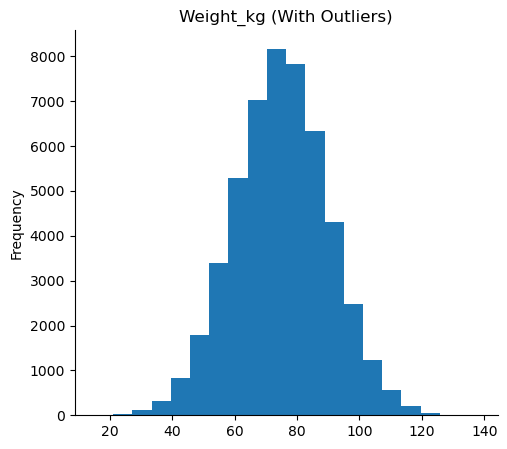

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
df['Weight_kg'].plot(kind='hist', bins=20, title='Weight_kg (With Outliers)')
plt.gca().spines[['top', 'right']].set_visible(False)

### **removing outliers with Z-score**

In [11]:
def remove_outliers_zscore(df, column_names, threshold=3):
    z_scores = np.abs((df[column_names] - df[column_names].mean()) / df[column_names].std())
    filtered_df = df[(z_scores < threshold).all(axis=1)]
    return filtered_df

# Removing outliers from Height and Weight
continuous_columns = ['Height_cm', 'Weight_kg']
df= remove_outliers_zscore(df, continuous_columns)
# df_cleaned = remove_outliers_zscore(df, continuous_columns)

print(f"Original data shape: {df.shape}")
# print(f"Data shape after outlier removal: {df_cleaned.shape}")

Original data shape: (49744, 16)


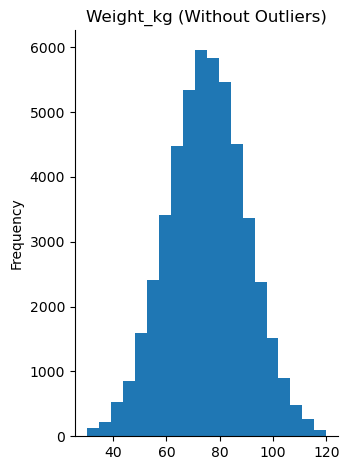

In [12]:
plt.subplot(1, 2, 2)  
df['Weight_kg'].plot(kind='hist', bins=20, title='Weight_kg (Without Outliers)')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()  
plt.show()

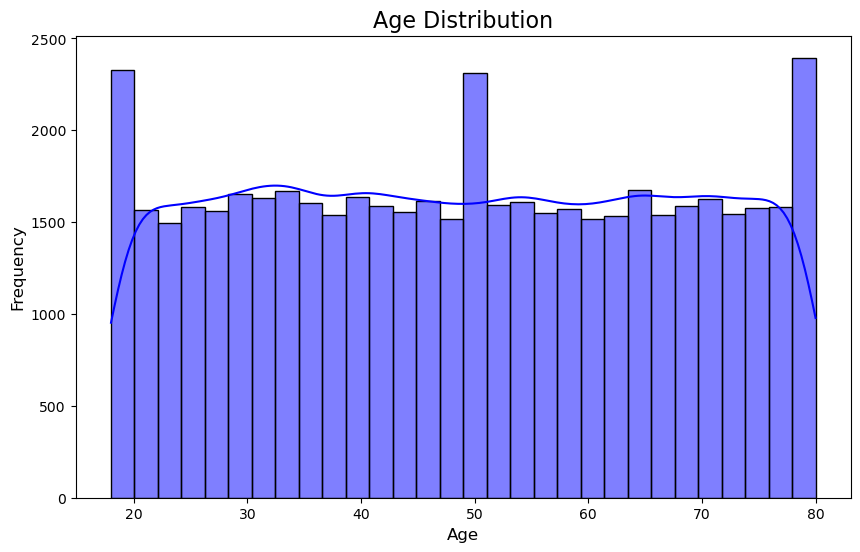

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


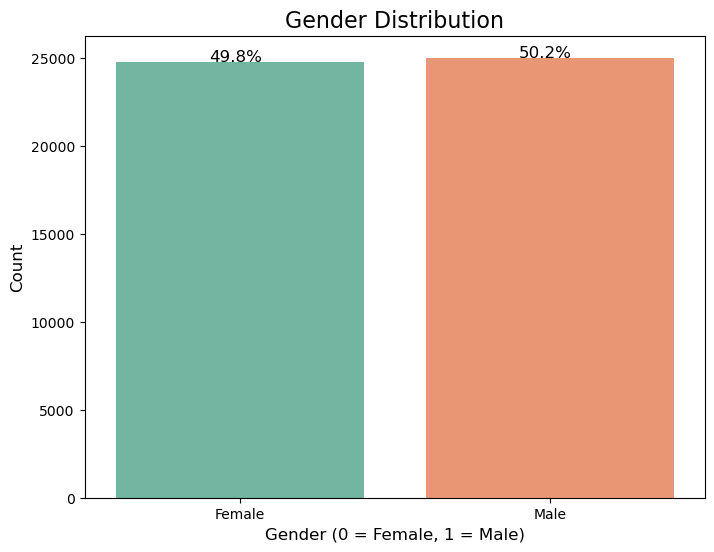

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'])  

total = len(df['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1 
    y = p.get_y() + p.get_height() + 5 
    ax.annotate(percentage, (x, y), size=12) 

plt.show()

### Obesity Status

In [15]:
from collections import Counter
print(f'Original Obesity Status Distribution: {Counter(df["Obesity_Status"])}')

Original Obesity Status Distribution: Counter({'Normal weight': 17442, 'Overweight': 15094, 'Obese': 12631, 'Underweight': 4577})


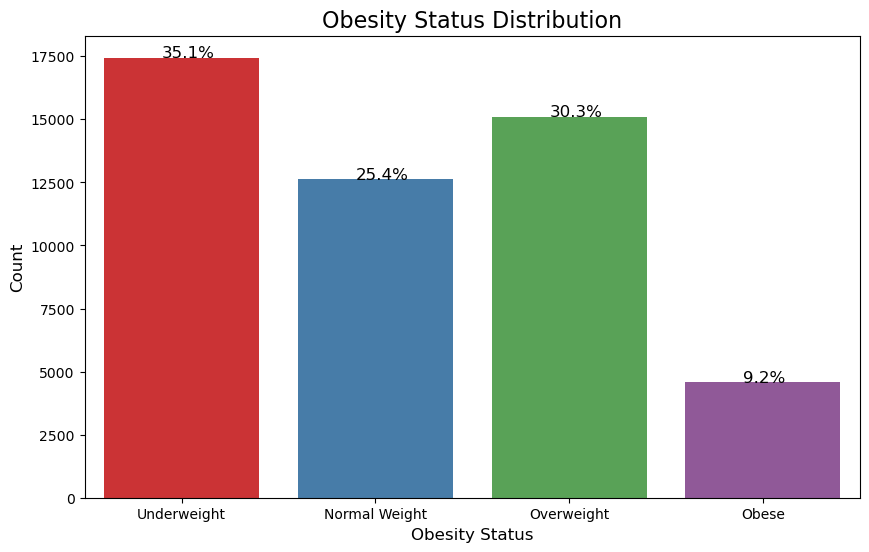

In [16]:
obesity_labels = {
    0: 'Underweight',
    1: 'Normal Weight',
    2: 'Overweight',
    3: 'Obese'
}


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Obesity_Status', data=df, palette='Set1')
plt.title('Obesity Status Distribution', fontsize=16)
plt.xlabel('Obesity Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

ax.set_xticklabels([obesity_labels[i] for i in range(len(obesity_labels))])

total = len(df['Obesity_Status'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()


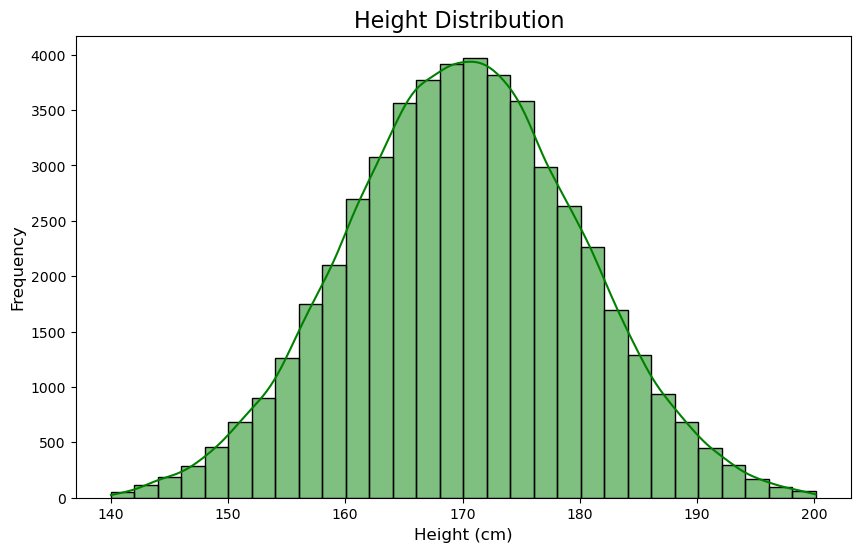

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Height_cm'], kde=True, bins=30, color='green')
plt.title('Height Distribution ', fontsize=16)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Encoding

In [18]:
label_encoder = LabelEncoder()
df['Obesity_Status'] = label_encoder.fit_transform(df['Obesity_Status'])
df['Blood_Pressure'] = label_encoder.fit_transform(df['Blood_Pressure'])

df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,172.005936,68.686179,23.215738,4,1,2,0,1,2,2,1,3,2,0
1,69,1,161.678497,79.937723,30.580688,2,0,0,0,0,0,1,2,1,3,1
2,46,1,172.078597,99.707918,33.672545,4,1,1,1,0,3,3,2,3,2,1
3,32,1,176.845709,76.314302,24.401520,1,2,0,1,0,3,3,1,2,1,0
4,60,1,170.875161,84.397860,28.905039,2,1,0,2,1,0,2,3,3,2,2


#### Scaling Continuous Variables

In [19]:
# Scaling numeric variables (Height and Weight)
scaler = StandardScaler()
df[['Height_cm', 'Weight_kg']] = scaler.fit_transform(df[['Height_cm', 'Weight_kg']])

In [20]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,0.195489,-0.428981,23.215738,4,1,2,0,1,2,2,1,3,2,0
1,69,1,-0.848148,0.330856,30.580688,2,0,0,0,0,0,1,2,1,3,1
2,46,1,0.202832,1.665974,33.672545,4,1,1,1,0,3,3,2,3,2,1
3,32,1,0.684572,0.086160,24.401520,1,2,0,1,0,3,3,1,2,1,0
4,60,1,0.081219,0.632057,28.905039,2,1,0,2,1,0,2,3,3,2,2


### Correlation Matrix

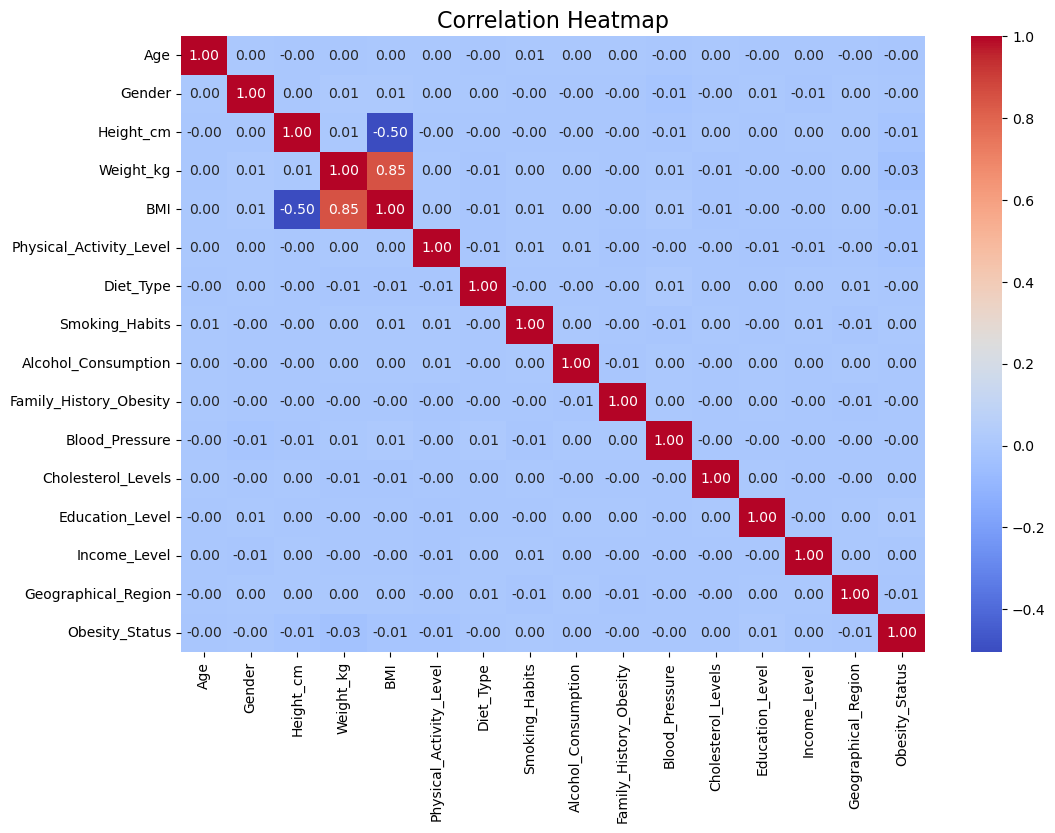

In [21]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

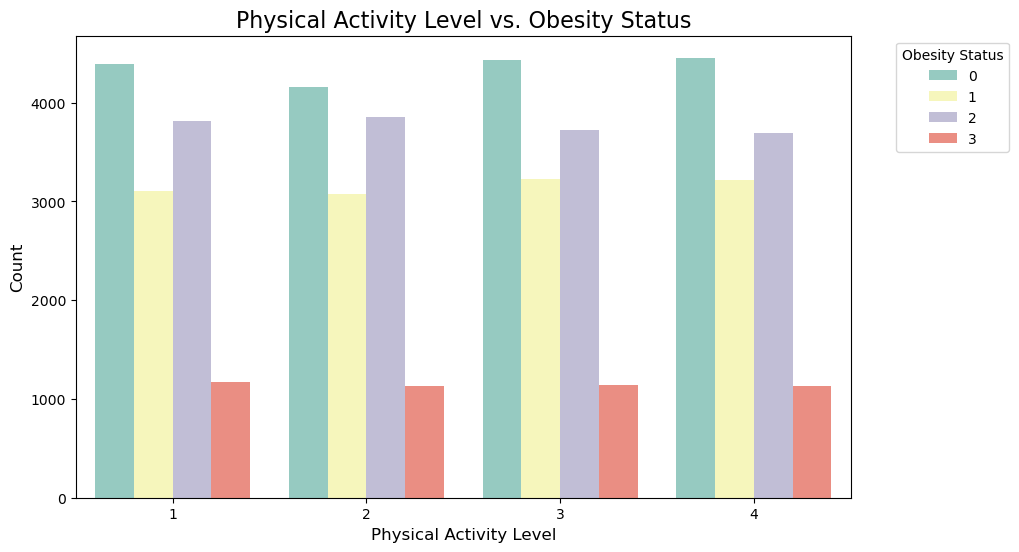

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical_Activity_Level', hue='Obesity_Status', data=df, palette='Set3')
plt.title('Physical Activity Level vs. Obesity Status', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Obesity Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


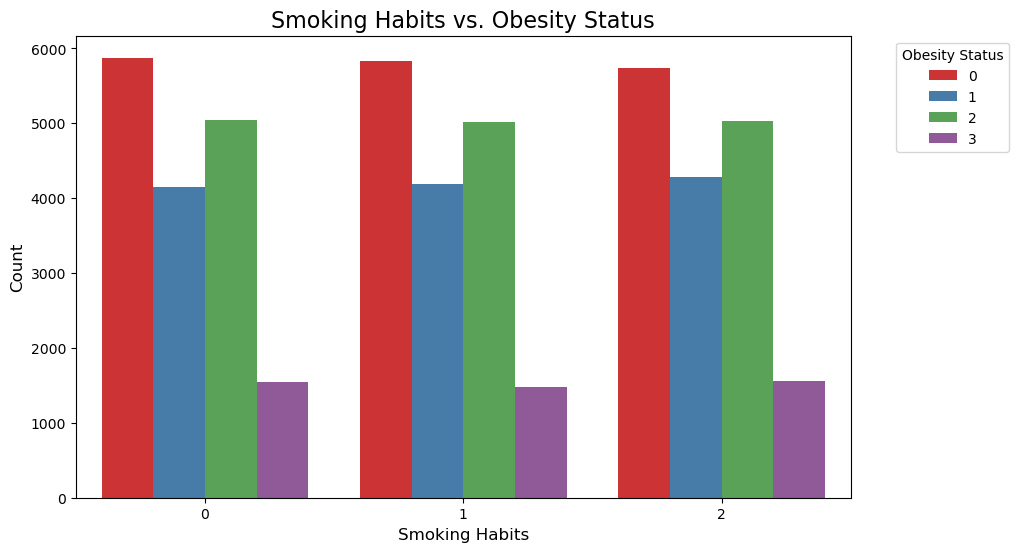

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking_Habits', hue='Obesity_Status', data=df, palette='Set1')
plt.title('Smoking Habits vs. Obesity Status', fontsize=16)
plt.xlabel('Smoking Habits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Obesity Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

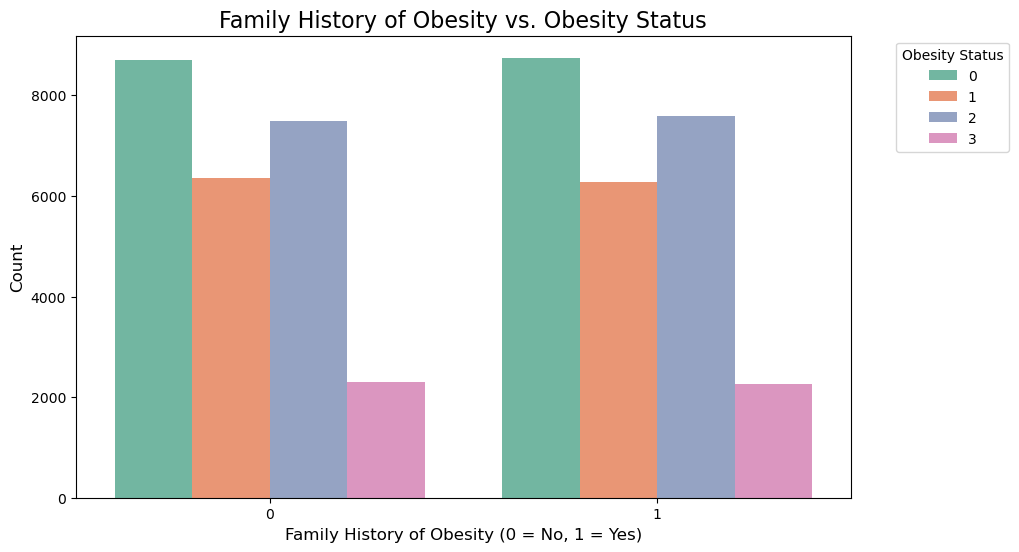

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_History_Obesity', hue='Obesity_Status', data=df, palette='Set2')
plt.title('Family History of Obesity vs. Obesity Status', fontsize=16)
plt.xlabel('Family History of Obesity (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Obesity Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


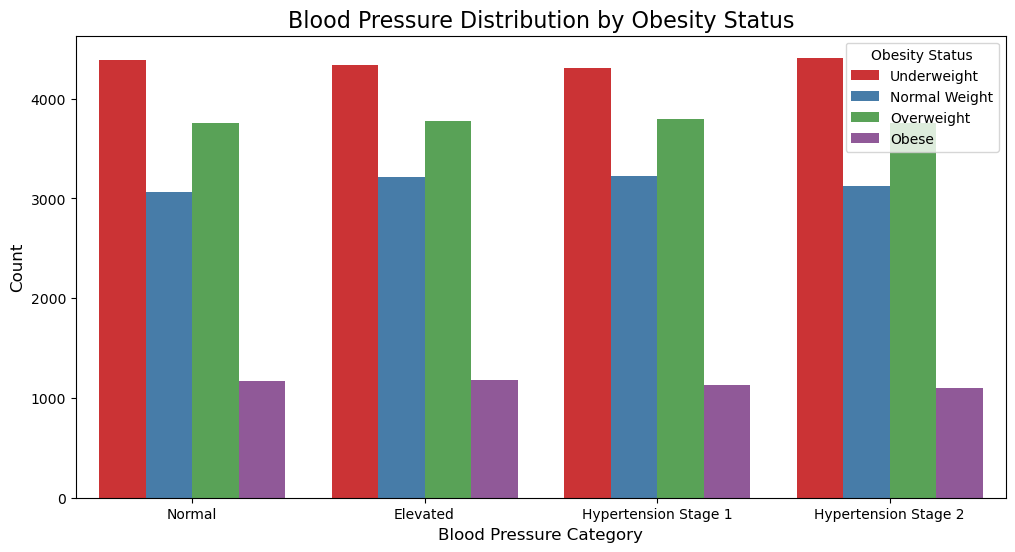

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping for Blood Pressure categories
blood_pressure_mapping = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension Stage 1',
    3: 'Hypertension Stage 2',

}

# Mapping for Obesity Status categories
obesity_labels = {
    0: 'Underweight',
    1: 'Normal Weight',
    2: 'Overweight',
    3: 'Obese'
}

plt.figure(figsize=(12, 6))

# Create the countplot with Obesity Status as hue
ax = sns.countplot(x='Blood_Pressure', hue='Obesity_Status', data=df, palette='Set1')

# Set x-axis tick labels with their corresponding meanings
ax.set_xticklabels([blood_pressure_mapping[int(tick.get_text())] for tick in ax.get_xticklabels()])

# Set legend labels for Obesity Status using the mapping
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [obesity_labels[int(label)] for label in labels], title='Obesity Status')

# Add titles and labels
plt.title('Blood Pressure Distribution by Obesity Status', fontsize=16)
plt.xlabel('Blood Pressure Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

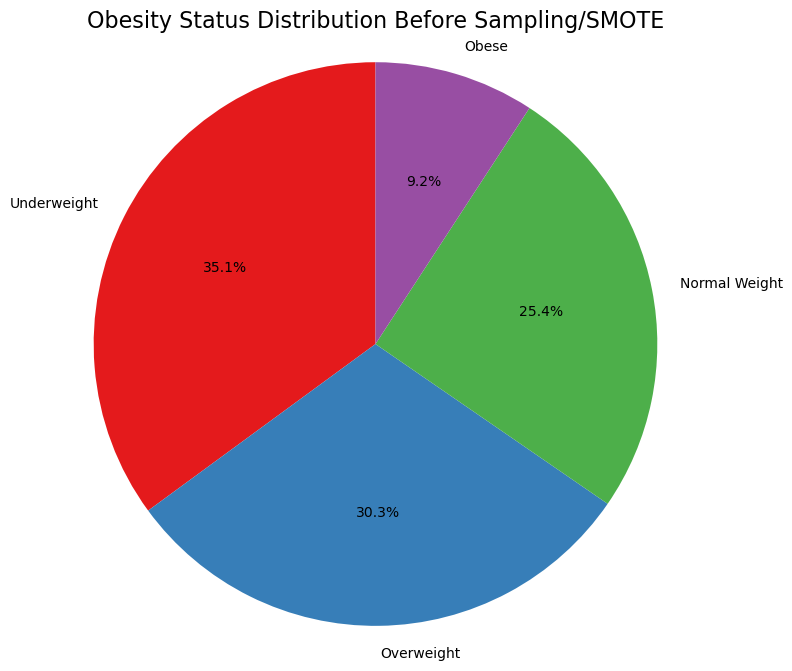

Obesity_Status
0    17442
2    15094
1    12631
3     4577
Name: count, dtype: int64


In [26]:
obesity_labels = {
    0: 'Underweight',
    1: 'Normal Weight',
    2: 'Overweight',
    3: 'Obese'
}

obesity_counts = df['Obesity_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=[obesity_labels[i] for i in obesity_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.axis('equal')  
plt.title('Obesity Status Distribution Before Sampling/SMOTE', fontsize=16)
plt.show()

print(df['Obesity_Status'].value_counts())

Obesity Status Distribution:
 Obesity_Status
0    17442
2    15094
1    12631
3     4577
Name: count, dtype: int64

Percentage Distribution:
 Obesity_Status
0    35.063525
2    30.343358
1    25.392007
3     9.201110
Name: proportion, dtype: float64


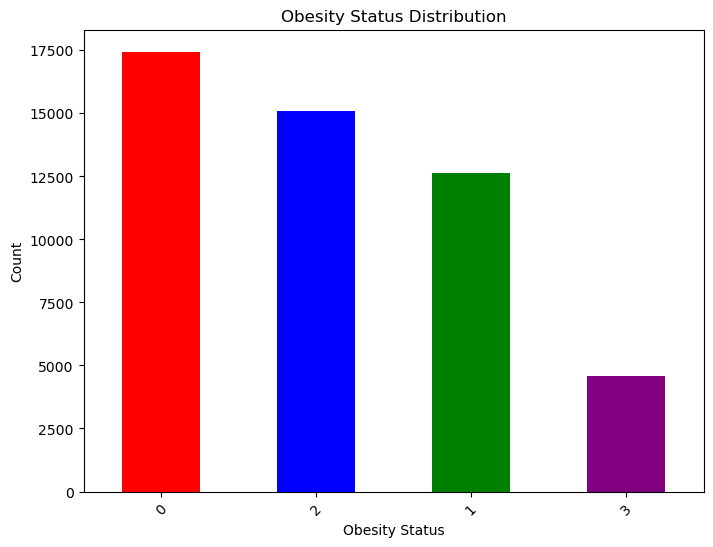

In [27]:
obesity_distribution = df['Obesity_Status'].value_counts()

obesity_percentage = df['Obesity_Status'].value_counts(normalize=True) * 100
print("Obesity Status Distribution:\n", obesity_distribution)
print("\nPercentage Distribution:\n", obesity_percentage)

plt.figure(figsize=(8, 6))
obesity_distribution.plot(kind='bar', color=['red', 'blue', 'green', 'purple'])
plt.title('Obesity Status Distribution')
plt.xlabel('Obesity Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
!pip install imbalanced-learn

### Using Only Smote Techniques 

In [29]:
X = df.drop('Obesity_Status', axis=1)  # Features
y = df['Obesity_Status']               # Target (Obesity_Status)

print(f'Original dataset shape: {Counter(y)}')

# Apply SMOTE to oversample the minority class 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape: {Counter(y_resampled)}')

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Obesity_Status')], axis=1)

Original dataset shape: Counter({0: 17442, 2: 15094, 1: 12631, 3: 4577})
Resampled dataset shape: Counter({0: 17442, 1: 17442, 2: 17442, 3: 17442})


#### Distribution after resampling 

In [30]:
df_resampled['Obesity_Status'].value_counts(normalize=True)

Obesity_Status
0    0.25
1    0.25
2    0.25
3    0.25
Name: proportion, dtype: float64

Obesity Status Distribution:
 Obesity_Status
0    17442
1    17442
2    17442
3    17442
Name: count, dtype: int64

Percentage Distribution:
 Obesity_Status
0    25.0
1    25.0
2    25.0
3    25.0
Name: proportion, dtype: float64


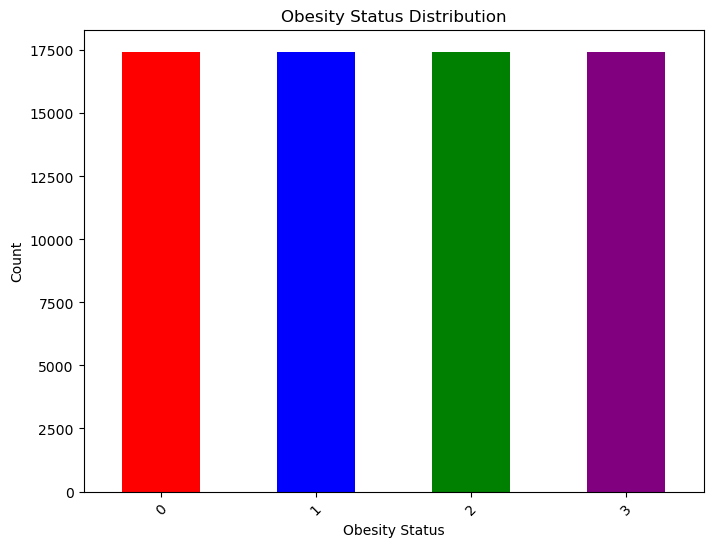

In [31]:
obesity_distribution = df_resampled['Obesity_Status'].value_counts()
obesity_percentage = df_resampled['Obesity_Status'].value_counts(normalize=True) * 100

print("Obesity Status Distribution:\n", obesity_distribution)
print("\nPercentage Distribution:\n", obesity_percentage)

plt.figure(figsize=(8, 6))
obesity_distribution.plot(kind='bar', color=['red', 'blue', 'green', 'purple'])
plt.title('Obesity Status Distribution')
plt.xlabel('Obesity Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Using Hybrid Techniques  **SMOTE+Undersampling [Edited Nearest Neighbors (ENN)]**

In [32]:
from imblearn.combine import SMOTEENN  # Hybrid technique combining SMOTE and Edited Nearest Neighbors
from collections import Counter

X = df.drop('Obesity_Status', axis=1) 
y = df['Obesity_Status']  # Target (Obesity_Status)

print(f'Original dataset shape: {Counter(y)}')

# Apply hybrid resampling (SMOTE + ENN)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# new class distribution after applying SMOTE + undersampling
print(f'Resampled dataset shape: {Counter(y_resampled)}')

Original dataset shape: Counter({0: 17442, 2: 15094, 1: 12631, 3: 4577})
Resampled dataset shape: Counter({3: 17277, 1: 16027, 2: 13903, 0: 13885})


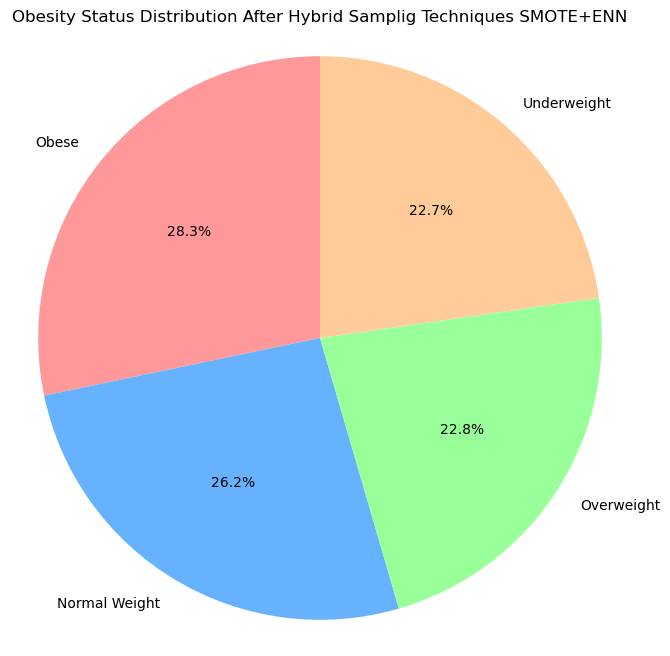

In [33]:
class_counts = pd.Series(y_resampled).value_counts()
class_proportions = class_counts / len(y_resampled) * 100  
obesity_labels = {
    0: 'Underweight',
    1: 'Normal Weight',
    2: 'Overweight',
    3: 'Obese'
}

plt.figure(figsize=(8, 8))
plt.pie(class_proportions, labels=[obesity_labels[i] for i in class_proportions.index], 
        autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF','#99FF99','#FFCC99'])
plt.title('Obesity Status Distribution After Hybrid Samplig Techniques SMOTE+ENN')
plt.axis('equal')  
plt.show()

### Using ML Models 

### Train Test Split 

In [34]:
X = df_resampled.drop('Obesity_Status', axis=1) 
y = df_resampled['Obesity_Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(55814, 15)

In [36]:
df_resampled.shape

(69768, 16)

**Random Forest**

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_rf = rf_model.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 1.0


In [40]:
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', class_report)

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3553
           1       1.00      1.00      1.00      3490
           2       1.00      1.00      1.00      3459
           3       1.00      1.00      1.00      3452

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



#### Random Forest Confusin Matrix

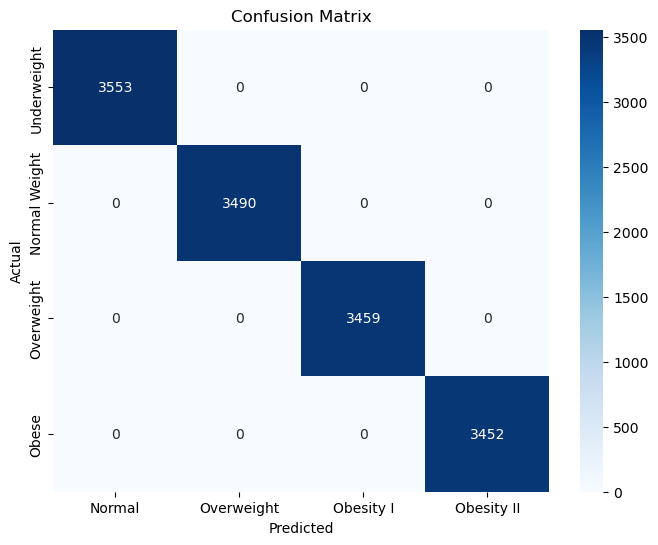

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Overweight', 'Obesity I', 'Obesity II'],
            yticklabels=[
    'Underweight',
    'Normal Weight',
    'Overweight',
    'Obese'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')

Logistic Regression Accuracy: 89.82%


**Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')

Decision Tree Accuracy: 100.00%


**SVM**

In [46]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [47]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

SVM Accuracy: 99.92%


In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

XGBoost Accuracy: 99.89%


In [50]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Overweight', 'Obesity I', 'Obesity II'],
                yticklabels=['Normal', 'Overweight', 'Obesity I', 'Obesity II'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Confusion Matrix  of Each Model

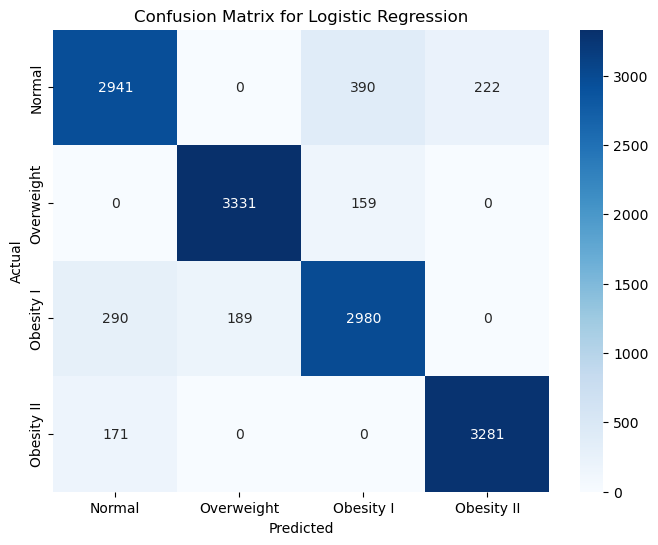

In [51]:
plot_confusion_matrix(conf_matrix_logistic, 'Logistic Regression')

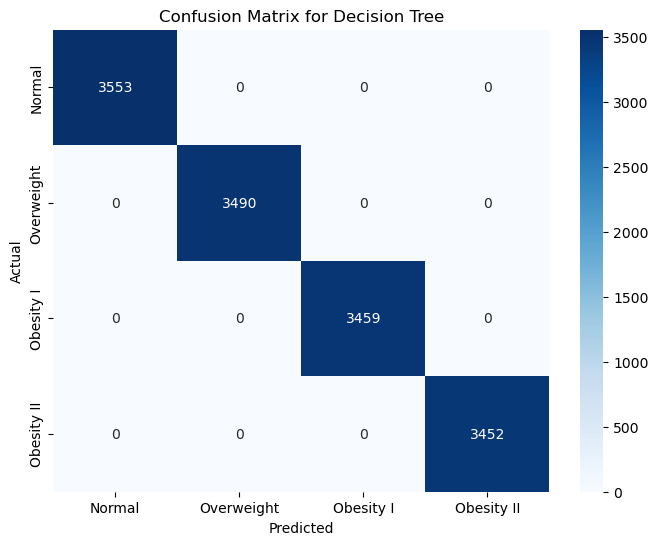

In [52]:
plot_confusion_matrix(conf_matrix_tree, 'Decision Tree')

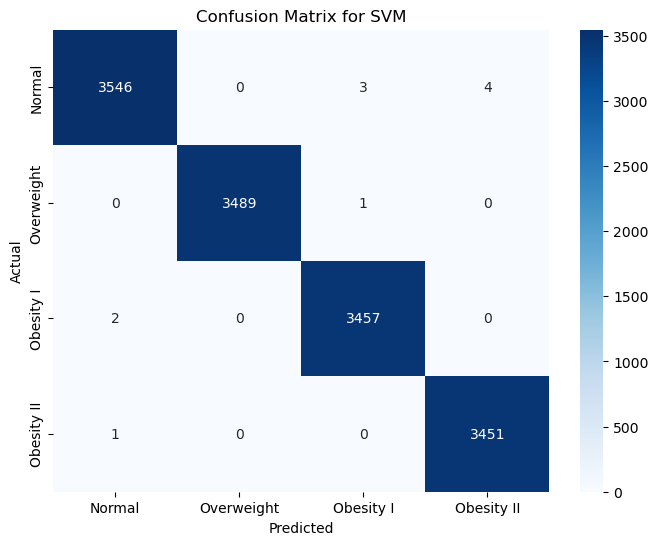

In [53]:
plot_confusion_matrix(conf_matrix_svm, 'SVM')

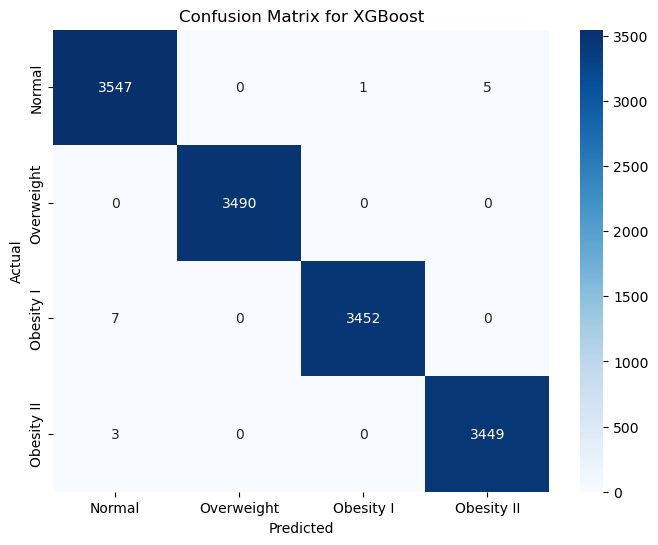

In [54]:
plot_confusion_matrix(conf_matrix_xgb, 'XGBoost')

In [55]:
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

Logistic Regression Accuracy: 89.82%
Decision Tree Accuracy: 100.00%
SVM Accuracy: 99.92%
XGBoost Accuracy: 99.89%


### Model Performance Comparison

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
y_preds = [y_pred_logistic, y_pred_rf, y_pred_xgb, y_pred_svm]

accuracy = []
precision = []
recall = []
f1 = []

for y_pred in y_preds:
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

# Display results in a DataFrame
import pandas as pd
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.898165   0.897826  0.898165  0.897856
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2              XGBoost  0.998853   0.998854  0.998853  0.998854
3                  SVM  0.999212   0.999212  0.999212  0.999212
